In [1]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [2]:
#Import any library here only.
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import random
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [3]:
#Setup and check a gpu connection.
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/OpenCode/OpenCodeData.zip'

Mounted at /content/drive
Archive:  /content/drive/MyDrive/OpenCode/OpenCodeData.zip
   creating: OpenCodeData/OpenCodeData/
   creating: OpenCodeData/OpenCodeData/INFECTED/
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person10_virus_35.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_475.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_477.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_478.jpeg  
  inflating: OpenCo

In [4]:
''' Do not change this cell '''
check_gpu()

PLease connect GPU


In [4]:
# Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
# Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
# Note that images are of different sizes.
# Load the dataset
NORMAL_BASE_DIR = '/content/OpenCodeData/OpenCodeData/NORMAL'
INFECTED_BASE_DIR = '/content/OpenCodeData/OpenCodeData/INFECTED'
Images=[]
Labels=[]

target_size = (224, 224) #Resize the image

normal_filenames = os.listdir(NORMAL_BASE_DIR)
infected_filenames = os.listdir(INFECTED_BASE_DIR)
random.shuffle(normal_filenames)
random.shuffle(infected_filenames)

for image in tqdm(normal_filenames):
    image_path = os.path.join(NORMAL_BASE_DIR, image)
    Labels.append("normal")
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, target_size)
    Images.append(resized_img)

for image in tqdm(infected_filenames):
    image_path = os.path.join(INFECTED_BASE_DIR, image)
    img_components = image.split('_')
    Labels.append(img_components[1])
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, target_size)
    Images.append(resized_img)

num_normal_images = Labels.count("normal")
num_viral_images = Labels.count("virus")
num_bacterial_images = Labels.count("bacteria")

print(f"\nNumber of Normal Images: {num_normal_images}")
print(f"Number of Viral Images: {num_viral_images}")
print(f"Number of Bacterial Images: {num_bacterial_images}")

100%|██████████| 390/390 [00:04<00:00, 90.72it/s] 


Number of Normal Images: 234
Number of Viral Images: 148
Number of Bacterial Images: 242


In [ ]:
''' Do not change this cell '''
check_data()

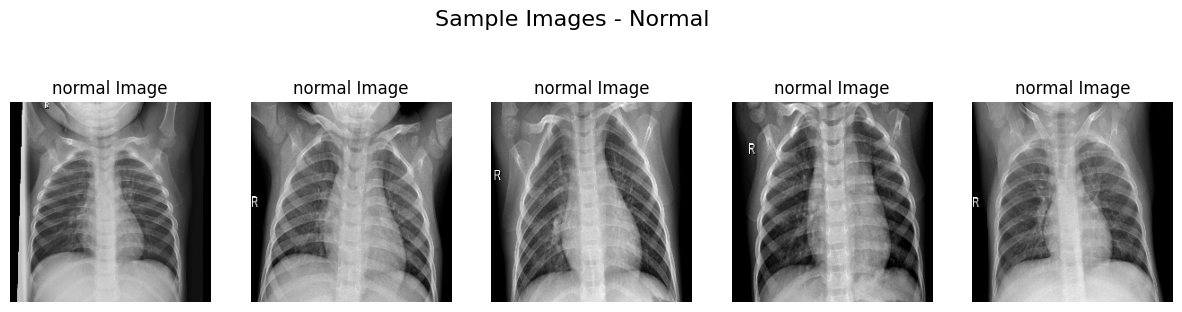

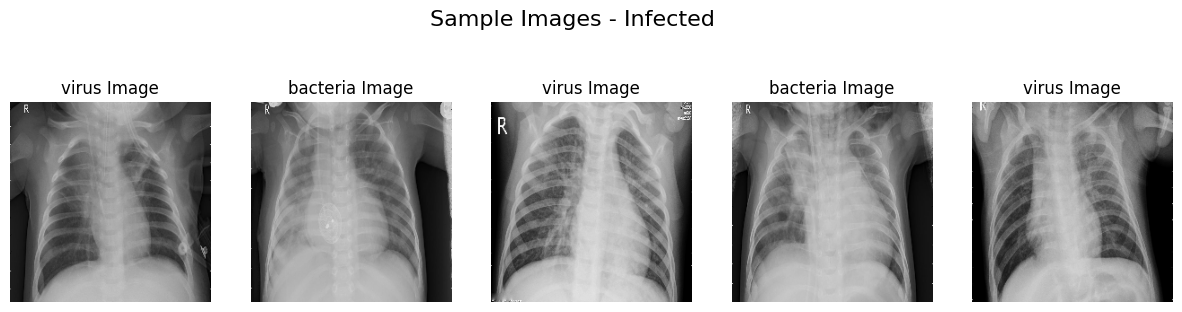

In [5]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.
plt.figure(figsize=(15, 7))
plt.suptitle('Sample Images - Normal', fontsize=16)

for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(Images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'{Labels[i]} Image')

plt.show()

plt.figure(figsize=(15, 7))
plt.suptitle('Sample Images - Infected', fontsize=16)

for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(Images[i+234], cv2.COLOR_BGR2RGB)) #Added 234 because,First 234 elements in Image and Labels are Normal One
    plt.axis('off')
    plt.title(f'{Labels[i+234]} Image')

plt.show()